# Problem Statement

#### Upgrade propensity model

In this task, we ask you to do an analysis to predict what customers will be most likely to upgrade
We provide a small sample of data you build the propensity model with, please note that this is dummy data but similar in construct to data you may be working with.
You will use this dataset to build your model.

#### Task list
- Data exploration, data cleaning and feature engineering. Remember to comment each step properly.
- Explanatory analysis. Include key insights in the presentation
- Modelling/Training
- Prepare a presentation for both a data science and a business audience and present the analysis to both, this will be the first part of the interview. Use visualisations and tell compelling stories. Tell us what is the message(s) for the business? What actionable insights you can provide to the business?
- Don’t limit yourself to the requested tasks. 

#### Required Output
- Fully commented code 
- Modelling dataset (CSV file)
- Visualisation tool files (if anything)
- Slides of presentations, including but not limited to:
    - Problem statement, Assumptions, Hypotheses
    - Exploratory analysis
    - Modelling approach
    - Results
        - Model performance measures
        - Business audience performance measures
        - Insights
    - Recommendations

# Data Exploration and Preparation

## Loading the data

- This section includes loading of the data, understanding basic description of the data; followed by cleanup & imputations if required.

In [155]:
# Importing the required packages

import random
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns
from collections import Counter

%matplotlib inline

# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.model_selection import train_test_split
# import category_encoders as ce


# # from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
# from xgboost import XGBClassifier
# from sklearn import metrics
# from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score,f1_score, precision_recall_curve,auc
# from sklearn.preprocessing import MinMaxScaler, StandardScaler
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold, RepeatedStratifiedKFold
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.decomposition import PCA
# from imblearn.combine import SMOTEENN
# from IPython.display import display
# from sklearn.compose import ColumnTransformer

# import warnings
# warnings.filterwarnings('ignore')

# import pickle

In [156]:
# Loading at the data and looking at the shape

data = pd.read_excel(r'data/DATA.xlsx')
print('Shape of data is:', data.shape)
upgrades = pd.read_excel(r'data/UPGRADES.xlsx')
print('Shape of upgrades dataset is:', upgrades.shape)

Shape of data is: (10350, 18)
Shape of upgrades dataset is: (10350, 2)


In [157]:
data.head()

,SUBSCRIPTION_KEY,AVERAGE_SPEND,VOICE_OFFNET_CNT_L3M,VOICE_OFFNET_DUR_L3M,VOICE_OUTBOUND_ROAM_CNT_L3M,SMS_OFFNET_CNT_L3M,SMS_OUTBOUND_ROAM_CNT_L3M,DATA_CNT_L3M,DATA_VOLUME_L3M,NUM_OF_UPGRADES,HANDSET_FIRST_DATE,HANDSET_LATEST_DATE,LOYALTY_FLAG,SEGMENT,TOPUP_VALUE_L3M,TOPUP_CNT_L3M,CALLS_CARE_CNTS_L6M,AUTO_TOPUP
0,462713,2.71,6,283,0.0,2,0.0,0.0,0.0,2.0,2015-09-26,2016-01-07,No,Segment3,8.1301,1.0,0.0,N
1,272924,16.26,3,34,1.0,13,9.0,0.0,0.0,0.0,2015-07-24,2016-01-07,Yes,Segment4,48.7806,3.0,1.0,N
2,319500,5.42,15,"2,477",0.0,36,0.0,0.0,0.0,0.0,2012-09-04,2016-01-07,No,Segment2,16.2602,1.0,0.0,N
3,106425,16.26,8,"1,702",0.0,25,0.0,0.0,0.0,0.0,2014-10-10,2016-01-07,No,Segment4,48.7806,3.0,0.0,N
4,90315,2.71,2,106,0.0,25,0.0,0.0,0.0,0.0,2015-05-17,2016-01-07,No,Segment3,8.1301,1.0,0.0,N


In [158]:
upgrades.head()

,SUBSCRIPTION_KEY,UPGRADE_FLAG
0,462713,NO
1,272924,NO
2,319500,NO
3,106425,NO
4,90315,NO


In [159]:
# Merging upgrades info with data
data = pd.merge(data, upgrades, on='SUBSCRIPTION_KEY')

## Variable Identification

In [160]:
# Looking at individual features
data.dtypes

SUBSCRIPTION_KEY                        int64
AVERAGE_SPEND                         float64
VOICE_OFFNET_CNT_L3M                    int64
VOICE_OFFNET_DUR_L3M                   object
VOICE_OUTBOUND_ROAM_CNT_L3M           float64
SMS_OFFNET_CNT_L3M                     object
SMS_OUTBOUND_ROAM_CNT_L3M             float64
DATA_CNT_L3M                          float64
DATA_VOLUME_L3M                       float64
NUM_OF_UPGRADES                       float64
HANDSET_FIRST_DATE             datetime64[ns]
HANDSET_LATEST_DATE            datetime64[ns]
LOYALTY_FLAG                           object
SEGMENT                                object
TOPUP_VALUE_L3M                       float64
TOPUP_CNT_L3M                         float64
CALLS_CARE_CNTS_L6M                   float64
AUTO_TOPUP                             object
UPGRADE_FLAG                           object
dtype: object

In [161]:
# Checking the count of unique target values
print(Counter(data['UPGRADE_FLAG']))

Counter({'NO': 10000, 'YES': 350})


In [162]:
# Checking for unique values

data.nunique()

SUBSCRIPTION_KEY               10350
AVERAGE_SPEND                     58
VOICE_OFFNET_CNT_L3M             143
VOICE_OFFNET_DUR_L3M            2954
VOICE_OUTBOUND_ROAM_CNT_L3M       73
SMS_OFFNET_CNT_L3M               626
SMS_OUTBOUND_ROAM_CNT_L3M        114
DATA_CNT_L3M                       1
DATA_VOLUME_L3M                    1
NUM_OF_UPGRADES                    4
HANDSET_FIRST_DATE              1402
HANDSET_LATEST_DATE                1
LOYALTY_FLAG                       2
SEGMENT                            5
TOPUP_VALUE_L3M                  110
TOPUP_CNT_L3M                     12
CALLS_CARE_CNTS_L6M                9
AUTO_TOPUP                         2
UPGRADE_FLAG                       2
dtype: int64

In [163]:
# looking at nan values accross dataset

data.isna().sum().loc[lambda x : x>0]

AVERAGE_SPEND                  50
VOICE_OUTBOUND_ROAM_CNT_L3M    50
SMS_OUTBOUND_ROAM_CNT_L3M      50
DATA_CNT_L3M                   50
DATA_VOLUME_L3M                50
NUM_OF_UPGRADES                50
LOYALTY_FLAG                   50
SEGMENT                        50
TOPUP_VALUE_L3M                50
TOPUP_CNT_L3M                  50
CALLS_CARE_CNTS_L6M            50
AUTO_TOPUP                     50
dtype: int64

In [164]:
# finding frequencies in categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']

print("Number of categorical variables:{}".format(len(categorical)))
print("The categorical variables are:",categorical)

for i in categorical:
    print(data[i].value_counts)
#     print(Counter(data[i]))

Number of categorical variables:6
The categorical variables are: ['VOICE_OFFNET_DUR_L3M', 'SMS_OFFNET_CNT_L3M', 'LOYALTY_FLAG', 'SEGMENT', 'AUTO_TOPUP', 'UPGRADE_FLAG']
<bound method IndexOpsMixin.value_counts of 0                                              283
1                                               34
2                                            2,477
3                                            1,702
4                                              106
                           ...                    
10345                                          253
10346                                            0
10347                                          249
10348                                        2,361
10349                                           36
Name: VOICE_OFFNET_DUR_L3M, Length: 10350, dtype: object>
<bound method IndexOpsMixin.value_counts of 0                                                2
1                                               13
2                     

In [165]:
# checking for duplicate records

print("Number of duplicate records are:{}".format(data.duplicated().sum()))

Number of duplicate records are:0


In [166]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SUBSCRIPTION_KEY,10350.0,238842.335362,137379.999580,4.0000,120194.2500,238182.0000,357392.2500,477531.0000
AVERAGE_SPEND,10300.0,10.210563,5.477842,1.3500,5.4200,10.8400,16.2600,46.0700
VOICE_OFFNET_CNT_L3M,10350.0,14.447729,21.641523,0.0000,0.0000,5.0000,19.0000,204.0000
VOICE_OUTBOUND_ROAM_CNT_L3M,10300.0,1.683107,7.276299,0.0000,0.0000,0.0000,0.0000,380.0000
SMS_OUTBOUND_ROAM_CNT_L3M,10300.0,2.631942,16.140975,0.0000,0.0000,0.0000,0.0000,681.0000
DATA_CNT_L3M,10300.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
DATA_VOLUME_L3M,10300.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
NUM_OF_UPGRADES,10300.0,0.071942,0.290927,0.0000,0.0000,0.0000,0.0000,3.0000
TOPUP_VALUE_L3M,10300.0,30.609399,16.508226,4.0569,16.2602,32.5204,48.7806,138.2117
TOPUP_CNT_L3M,10300.0,2.024951,1.051014,1.0000,1.0000,2.0000,3.0000,12.0000


In [167]:
# Dropping redundant and unnecessary columns

data.drop('SUBSCRIPTION_KEY', axis=1, inplace=True)

#### Initial Observations:

- There are a total of 10350 records in the dataset with 10000 records set to 'NO' upgrade and the remaining 350 records set to 'YES'.
- At first glance, it is a binary classification problem with imbalance issue clearly visible.
- There are a total of 20 features and 1 target variable in the dataset.
- There are no duplicate records.
- There are no negative values as shown from the min values.
- The columns have different ranges and magnitudes which suggests that scaling could be required if distance based algorithms are used.
- There is definite skewness in few of the variables since there is a jump from min 0 compared to max.
- There are missing values visible but they range across different rows and columns. The missing value count of all variables is 50 which is peculiar.

## Missing value treatment

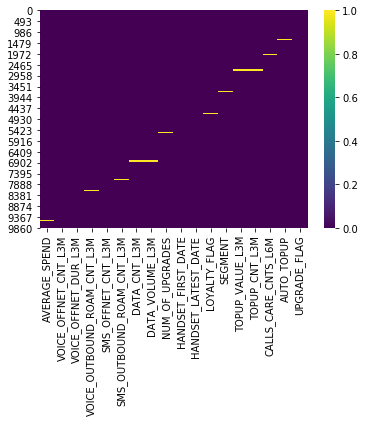

In [168]:
# Visualizing missing values across data

sns.heatmap(data.isnull(), cmap='viridis');

### Handling numerical columns with missing data

In [169]:
num_cols = [var for var in data.columns if data[var].dtype=='int64' or data[var].dtype=='float64']
data[num_cols].isna().sum().loc[lambda x : x>0]

AVERAGE_SPEND                  50
VOICE_OUTBOUND_ROAM_CNT_L3M    50
SMS_OUTBOUND_ROAM_CNT_L3M      50
DATA_CNT_L3M                   50
DATA_VOLUME_L3M                50
NUM_OF_UPGRADES                50
TOPUP_VALUE_L3M                50
TOPUP_CNT_L3M                  50
CALLS_CARE_CNTS_L6M            50
dtype: int64

In [170]:
# Using mean imputation to impute float variables

num_nul_cols = ['AVERAGE_SPEND', 'VOICE_OUTBOUND_ROAM_CNT_L3M', 'SMS_OUTBOUND_ROAM_CNT_L3M', 'DATA_CNT_L3M', 
                'DATA_VOLUME_L3M', 'NUM_OF_UPGRADES', 'TOPUP_VALUE_L3M', 'TOPUP_CNT_L3M', 'CALLS_CARE_CNTS_L6M']

data[num_nul_cols] = data[num_nul_cols].fillna(data[num_nul_cols].mean())

In [171]:
data.isna().sum().loc[lambda x: x>0]

LOYALTY_FLAG    50
SEGMENT         50
AUTO_TOPUP      50
dtype: int64

### Handling categorical columns with missing data

In [172]:
cat_cols = ['LOYALTY_FLAG', 'SEGMENT', 'AUTO_TOPUP']

for i in cat_cols:
    print(Counter(data[i]))

Counter({'No': 6952, 'Yes': 3348, nan: 50})
Counter({'Segment3': 4759, 'Segment1': 2242, 'Segment2': 1678, 'Segment4': 1597, nan: 50, 'UNKNOWN': 24})
Counter({'N': 10139, 'Y': 161, nan: 50})


In [173]:
# Imputing na with 'UNKNOWN' since this already exists and retaining it captures the importance of missingness
data['SEGMENT'] = data['SEGMENT'].fillna("UNKNOWN")

In [174]:
# Creating function to impute with most frequency category
def nan_freq_imputer(df,ColName):
     most_freq_cat=df[ColName].mode()[0]
    # replace nan values with most occured category
     df[ColName].fillna(most_freq_cat,inplace=True)

In [175]:
for col in ['LOYALTY_FLAG', 'AUTO_TOPUP']:
    nan_freq_imputer(data,col)

In [176]:
cat_cols = ['LOYALTY_FLAG', 'SEGMENT', 'AUTO_TOPUP']

for i in cat_cols:
    print(Counter(data[i]))

Counter({'No': 7002, 'Yes': 3348})
Counter({'Segment3': 4759, 'Segment1': 2242, 'Segment2': 1678, 'Segment4': 1597, 'UNKNOWN': 74})
Counter({'N': 10189, 'Y': 161})


#### Actions Taken:

- Missing value treatment is done using the below ways:
    - Numerical values: Mean imputation is performed to impute the missing values.
    - Categorical values: Frequency imputation is performed for 2 of them and since only feature already has the 'UNKNOWN' categorical these NA values are imputed with 'UNKNOWN'.